<a href="https://colab.research.google.com/github/arjangvt/CodeFolio/blob/main/ML/TimeSeries/Granger_Causality_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code demonstrates a Granger Causality test in python.<br>
I could not find any real data for Granger Causality test. So I decided to generate the data symthetically.<br>

If you know any real data that can be used for Granger Causality please let me know.<br> 
My email is arjangvt at gmail dot com <br>

<br><br>
---

Written by: Arjang Fahim <br>
Date: 2/11/2022 <br>
Last update: 2/11/2022

In [1]:
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#build the time series, just a simple AR(1)
t1 = [0.1*np.random.normal()]
for _ in range(100):
    t1.append(0.5*t1[-1] + 0.1*np.random.normal())

In [4]:
#build the time series that is granger caused by t1
t2 = [item + 0.1*np.random.normal() for item in t1]

In [5]:
# adjust t1 and t2. Here we shift the data three unit (can be month for example)
t1 = t1[3:]
t2 = t2[:-3]

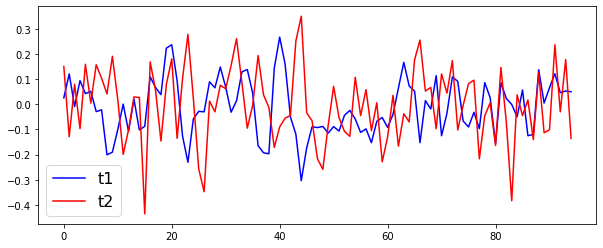

In [6]:
plt.figure(figsize=(10,4))
plt.plot(t1, color='b')
plt.plot(t2, color='r')

plt.legend(['t1', 't2'], fontsize=16)

In [7]:
# make sure you put t2 that is a caused by t1 column as the 
# first column of the dataframe
ts_df = pd.DataFrame(columns=['t2', 't1'], data=zip(t2,t1))

In [8]:
ts_df

,t2,t1
0,0.150297,0.025547
1,-0.128759,0.120774
2,0.079427,-0.008982
3,-0.096804,0.093960
4,0.158896,0.042272
...,...,...
90,-0.101808,0.065971
91,0.236480,0.121449
92,-0.030258,0.045767
93,0.177469,0.052794


In [13]:
# the function argument three means we check
# for the three lags
gc_res = grangercausalitytests(ts_df, 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1248  , p=0.7247  , df_denom=91, df_num=1
ssr based chi2 test:   chi2=0.1290  , p=0.7195  , df=1
likelihood ratio test: chi2=0.1289  , p=0.7196  , df=1
parameter F test:         F=0.1248  , p=0.7247  , df_denom=91, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.6607  , p=0.0297  , df_denom=88, df_num=2
ssr based chi2 test:   chi2=7.7374  , p=0.0209  , df=2
likelihood ratio test: chi2=7.4324  , p=0.0243  , df=2
parameter F test:         F=3.6607  , p=0.0297  , df_denom=88, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=37.2494 , p=0.0000  , df_denom=85, df_num=3
ssr based chi2 test:   chi2=120.9511, p=0.0000  , df=3
likelihood ratio test: chi2=77.2132 , p=0.0000  , df=3
parameter F test:         F=37.2494 , p=0.0000  , df_denom=85, df_num=3


If you look at just lag1 p values are not close to 0.05 and are large numbers so lag one alone does not show the time series t2 is not  Granger caused by the time series t1. <br>
Lag2 p_val gets better, and in lag 3 they are  zero 
